<a href="https://colab.research.google.com/github/lucas-t-reis/data-science/blob/master/MovieLens_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup
Setting up necessary libs and importing the dataset


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

movies = pd.read_csv("https://raw.githubusercontent.com/lucas-t-reis/data-science/master/datasets/ml-latest-small/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/lucas-t-reis/data-science/master/datasets/ml-latest-small/ratings.csv")

# Movie rating histogram


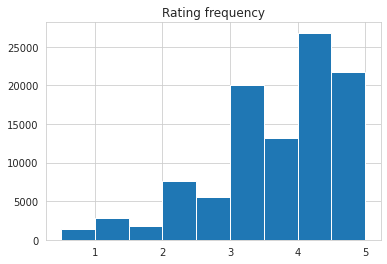

In [59]:
# Histogram parameter adjustment
offset = 0.5
hist_start = ratings["rating"].min()
hist_end = ratings["rating"].max()

# Plotting
plt.hist(ratings["rating"], bins=np.arange(hist_start, hist_end + offset, offset) )
plt.title("Rating frequency")
plt.show()


Observations:
- The majority of users tend to rate a movie with a score higher than 3

Now let us group each movie with it's average rating.

In [60]:
# Getting the average rating of each movie
movie_avg_rating = ratings.groupby("movieId")["rating"].mean()

# Associating id with it's name
movie_avg_rating = movies.join(movie_avg_rating, on="movieId")


movie_avg_rating.sort_values("rating", ascending=False).head(20)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Either there are a lot of great movies or they happen to have few ratings but with a high score. Let's see how many ratings each movie has.


In [61]:
# Adding a new column
votes = ratings.groupby("movieId")["rating"].count()
votes.name = "votes"
movie_avg_rating = pd.merge(movie_avg_rating, votes, on="movieId")

# Checking the top movies again
movie_avg_rating.sort_values("rating", ascending=False)

,movieId,title,genres,rating,votes
7638,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1
8089,100556,"Act of Killing, The (2012)",Documentary,5.0,1
9065,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1
9076,143511,Human (2015),Documentary,5.0,1
9078,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1
...,...,...,...,...,...
9253,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.5,1
7536,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.5,1
6486,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.5,1
5200,8494,"Cincinnati Kid, The (1965)",Drama,0.5,1


As suspected, the "winners" just happend to get a single high score. Let's try to get the "real" winners by considering the **rating** and the **votes**.

In [62]:
movie_avg_rating = movie_avg_rating.sort_values(["votes","rating"],ascending=False)
movie_avg_rating

,movieId,title,genres,rating,votes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
...,...,...,...,...,...
9401,165645,Bad Santa 2 (2016),Comedy,0.500000,1
9426,167296,Iron Man (1931),Drama,0.500000,1
9540,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.500000,1
9572,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.500000,1


Let's now see how many of each genre there is in this dataset


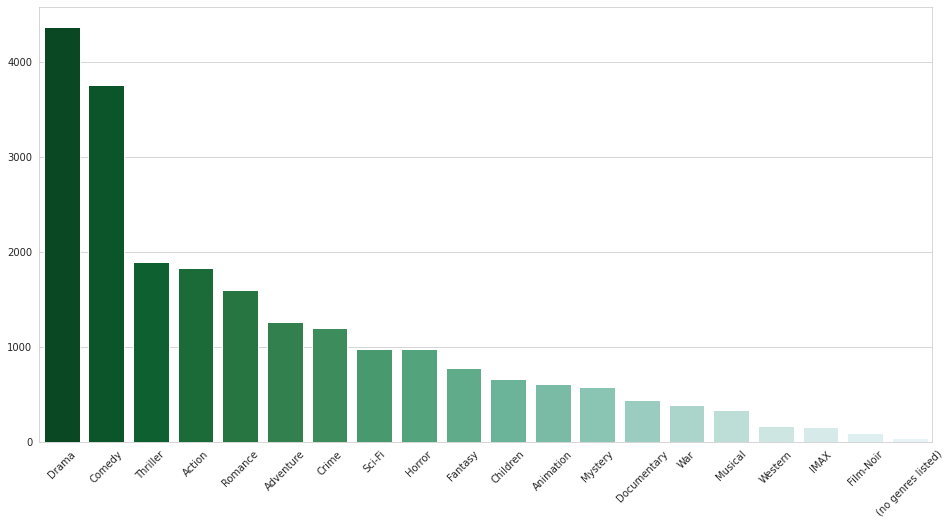

In [63]:
# From genres column get each row string, tokenize using | as separator and increment the respective genre
genres = movies["genres"].str.get_dummies("|").sum().sort_values(ascending=False)

# Using seaborn for it's customization friendly tools
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
colors = sns.color_palette("BuGn_r", n_colors=len(genres) + 2) # +2 So the least frequent doesn't get 'invisible' 

# Plotting
genres_hist = sns.barplot(x=genres.index, y=genres.values,palette=colors)
genres_hist.set_xticklabels(genres_hist.get_xticklabels(), rotation=45)
plt.show()

From the chart above we can see that:
- Drama and Comedy both appear at least twice as much as the other genres.
- IMAX, even though not a genre but an video quality attribute, appears in this dataset as a genre


Let's now have a look at the rating distribution of this sample and the distribution of the top 5 movies.

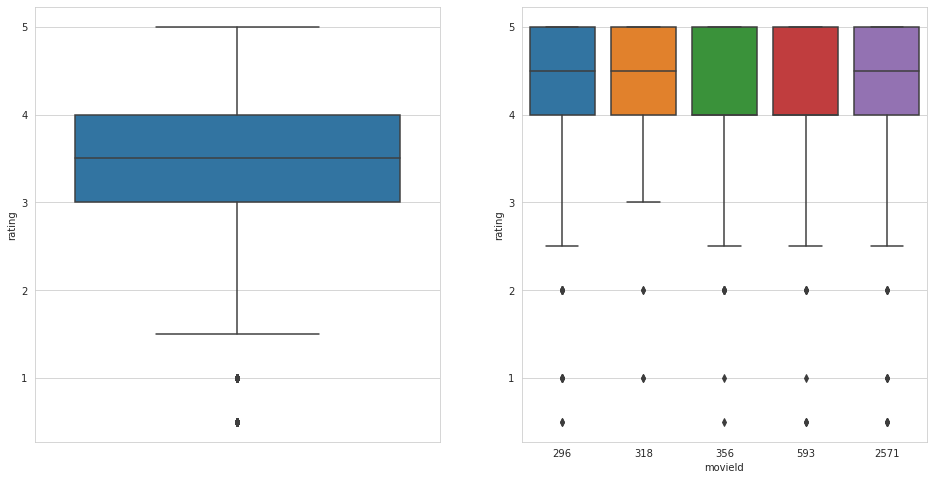

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ratings_boxplot = sns.boxplot(data=ratings, y="rating")
plt.subplot(1,2,2)
top5movies_boxplot =  sns.boxplot(data=ratings.query("movieId in [356, 318, 296, 593, 2571]"), x="movieId", y="rating")
plt.show()

## Observations
From the chart on the **left**:
- In this dataset the majority of the movies got a rating between 3 and 4
- 3.5 was the median value
- The amount of low ratings varied more than the high ratings, staying between 1.5 and 3
- There are some outlier regarding low ratings

From the chart on the **right**:
- In three movies (296, 318, 2571) the distribution was the same, meaning viewers rating were very similar.
- In two movies (356, 593) the median was 4, which is lower than the other 3.
- Movie 318 had a more 'stable' distribution of ratings, with less variation on it's lower quartile. Overall this consistency means it's a little bit easier to predict ratings on this movie.

